# 🏠 House Price Prediction with Linear Regression

This project predicts California house prices using **Linear Regression** with scikit-learn.  

We use **two features**:  
- `AveRooms` → Average number of rooms per household  
- `AveOccup` → Average household occupancy 

📊 Model Performance:
Mean Squared Error (MSE): 1.29
R² Score: 0.01


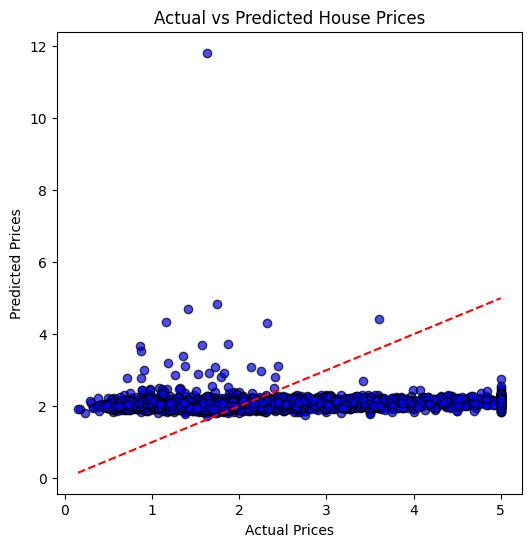

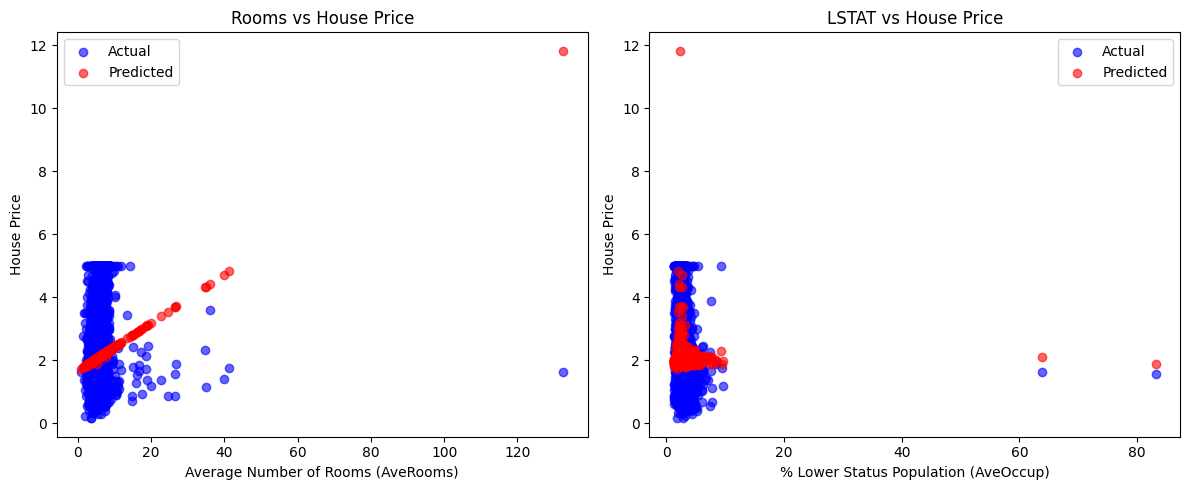

In [2]:
# House Price Prediction with Linear Regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# 1. Load Dataset
# ---------------
boston = fetch_california_housing()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

# Select only 2 features for simplicity
X = X[["AveRooms", "AveOccup"]]   

# 2. Train-Test Split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 3. Train Linear Regression Model
# ----------------------------
model = LinearRegression()
model.fit(X_train, y_train)


# 4. Predictions
# --------------
y_pred = model.predict(X_test)

# 5. Evaluation
# ------------
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


# 6. Visualization - Actual vs Predicted
# ----------------------------
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color="blue", edgecolors="k", alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


# 7. Visualization - Feature vs Price
# ----------------------------
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Feature 1: AveRooms (avg rooms)
axes[0].scatter(X_test["AveRooms"], y_test, color="blue", alpha=0.6, label="Actual")
axes[0].scatter(X_test["AveRooms"], y_pred, color="red", alpha=0.6, label="Predicted")
axes[0].set_xlabel("Average Number of Rooms (AveRooms)")
axes[0].set_ylabel("House Price")
axes[0].set_title("Rooms vs House Price")
axes[0].legend()

# Feature 2: AveOccup (% lower status population)
axes[1].scatter(X_test["AveOccup"], y_test, color="blue", alpha=0.6, label="Actual")
axes[1].scatter(X_test["AveOccup"], y_pred, color="red", alpha=0.6, label="Predicted")
axes[1].set_xlabel("% Lower Status Population (AveOccup)")
axes[1].set_ylabel("House Price")
axes[1].set_title("LSTAT vs House Price")
axes[1].legend()

plt.tight_layout()
plt.show()
